## Final Project Submission

Please fill out:
* Student name: BEDAN KIBUNJA CHEGE
* Student pace: full time
* Scheduled project review date/time: 22/03/2024
* Instructor name: ASHA DEEN
* Blog post URL:


Business Problem
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

Research Questions;
1. what are the most popular movie genres?
2. 

In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import sqlite3
conn = sqlite3.connect(r"C:\Users\bedan\moringa\microsoft-movies-project\zippedData\im.db\im.db")
cur=conn.cursor()

Import the data into dataframes by using panda
Read the data with the corresponding file paths.
Data inspection
Data Sets;
    Box Office Mojo
    IMDB
    Rotten Tomatoes
    TheMovieDB
    The Numbers


In [2]:
bom_movies=pd.read_csv(r"C:\Users\bedan\moringa\microsoft-movies-project\zippedData\bom.movie_gross.csv\bom.movie_gross.csv")
bom_movies

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [3]:
rtreview_tsv=pd.read_csv(r"C:\Users\bedan\moringa\microsoft-movies-project\zippedData\rt.reviews.tsv\rt.reviews.tsv", sep='\t', encoding='latin1')
rtreview_tsv

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [4]:
rtmovie_info=pd.read_csv(r"C:\Users\bedan\moringa\microsoft-movies-project\zippedData\rt.movie_info.tsv\rt.movie_info.tsv", sep='\t')
rtmovie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [5]:
tnmovies_budget=pd.read_csv(r"C:\Users\bedan\moringa\microsoft-movies-project\zippedData\tn.movie_budgets.csv\tn.movie_budgets.csv")
tnmovies_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [6]:
tmdbmovies_budget=pd.read_csv(r"C:\Users\bedan\moringa\microsoft-movies-project\zippedData\tmdb.movies.csv\tmdb.movies.csv")
tmdbmovies_budget

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [7]:
movies_imdb=pd.read_sql("""
SELECT *
  FROM movie_basics
  JOIN movie_ratings 
  USING (movie_id) ;
""",conn)
movies_imdb

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


# DATA CLEANING 
checking completeness of the data sets 

In [8]:
bom_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [9]:
rtmovie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [10]:
rtreview_tsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [11]:
tnmovies_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [12]:
tmdbmovies_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [13]:
movies_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


# BOM DATA CLEANING

In [14]:
# Drop rows with missing studio values
bom_movies.dropna(subset=['studio'], inplace=True)
# Fill missing domestic_gross with mean
bom_movies['domestic_gross'].fillna(bom_movies['domestic_gross'].mean(), inplace=True)
# change domestic_gross from float to integer
bom_movies.loc[:,'domestic_gross']= bom_movies['domestic_gross'].astype(int)
# Fill missing foreign_gross with mean after converting to numeric
bom_movies['foreign_gross'] = pd.to_numeric(bom_movies['foreign_gross'], errors='coerce')
bom_movies['foreign_gross'].fillna(bom_movies['foreign_gross'].mean(), inplace=True)
# change foreign_gross from object to integer
bom_movies.loc[:,'foreign_gross']= bom_movies['foreign_gross'].astype(int)
bom_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           3382 non-null   object
 1   studio          3382 non-null   object
 2   domestic_gross  3382 non-null   int32 
 3   foreign_gross   3382 non-null   int32 
 4   year            3382 non-null   int64 
dtypes: int32(2), int64(1), object(2)
memory usage: 132.1+ KB


# MOVIES IMDB DATA

In [15]:
#drop duplicated titles 
movies_imdb.drop(columns=['original_title'], inplace=True)
#fill runtime_minutes from NAN to mean
movies_imdb['runtime_minutes'].fillna(movies_imdb['runtime_minutes'].mean(), inplace=True)
# Fill missing genres with 'Unknown'
movies_imdb['genres'].fillna('Unknown', inplace=True)
movies_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   start_year       73856 non-null  int64  
 3   runtime_minutes  73856 non-null  float64
 4   genres           73856 non-null  object 
 5   averagerating    73856 non-null  float64
 6   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 3.9+ MB


# TN MOVIES DATA

In [16]:
#covert string 'currency symbol' to float and remove the commas
import locale
locale.setlocale(locale.LC_ALL, '')
tnmovies_budget['domestic_gross']= tnmovies_budget.domestic_gross.map(lambda x: locale.atof(x.strip('$')))
tnmovies_budget['production_budget']= tnmovies_budget.production_budget.map(lambda x: locale.atof(x.strip('$')))
tnmovies_budget['worldwide_gross']= tnmovies_budget.worldwide_gross.map(lambda x: locale.atof(x.strip('$')))
tnmovies_budget


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00


In [17]:
tnmovies_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


In [18]:
#conveting float to integer
tnmovies_budget['domestic_gross'] = tnmovies_budget['domestic_gross'].astype(int)
tnmovies_budget['production_budget'] = tnmovies_budget['production_budget'].astype(int)
tnmovies_budget['worldwide_gross'] = tnmovies_budget['worldwide_gross'].astype(int)
tnmovies_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,-2147483648
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


# MERGE DATA FRAMES
Merge important data frames to help answer you question 

In [19]:
#merge bom_movies to movies_imdb and assign it to merged1_movies
#rename primary_title to title first to make it easy to merge the two
movies_imdb.rename(columns={'primary_title':'title'}, inplace=True)
merged1_movies = pd.merge (movies_imdb, bom_movies, on='title')
merged1_movies

,movie_id,title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000,75139698,2016
1,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000,8000000,2012
2,tt4339118,On the Road,2014,89.0,Drama,6.0,6,IFC,744000,8000000,2012
3,tt5647250,On the Road,2016,121.0,Drama,5.7,127,IFC,744000,8000000,2012
4,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000,129900000,2013
...,...,...,...,...,...,...,...,...,...,...,...
3019,tt8331988,The Chambermaid,2018,102.0,Drama,7.1,147,FM,300,75139698,2015
3020,tt8404272,How Long Will I Love U,2018,101.0,Romance,6.5,607,WGUSA,747000,82100000,2018
3021,tt8427036,Helicopter Eela,2018,135.0,Drama,5.4,673,Eros,72000,75139698,2018
3022,tt9078374,Last Letter,2018,114.0,"Drama,Romance",6.4,322,CL,181000,75139698,2018


# SUMMARY STATISTICS


In [20]:
#lets use the decribe() to get the summary statistice for all numeric colums
# we will use our megerd data set
merged1_movies.describe()

,start_year,runtime_minutes,averagerating,numvotes,domestic_gross,foreign_gross,year
count,3024.000000,3024.000000,3024.000000,3.024000e+03,3.024000e+03,3.024000e+03,3024.000000
mean,2013.783069,107.022731,6.458267,6.175468e+04,3.063810e+07,7.713727e+07,2014.077381
std,2.467231,19.964087,1.009946,1.255633e+05,6.650413e+07,1.078324e+08,2.442585
min,2010.000000,3.000000,1.600000,5.000000e+00,1.000000e+02,6.000000e+02,2010.000000
25%,2012.000000,94.000000,5.900000,2.119000e+03,1.447500e+05,1.310000e+07,2012.000000
50%,2014.000000,104.000000,6.600000,1.311500e+04,2.100000e+06,7.513970e+07,2014.000000
75%,2016.000000,118.000000,7.100000,6.299550e+04,3.220000e+07,7.513970e+07,2016.000000
max,2019.000000,272.000000,9.200000,1.841066e+06,7.001000e+08,9.464000e+08,2018.000000


In [21]:
#separate the genre that are combined while dropping the nulls
merged1_movies['genres'].unique()
merged1_movies[['genre_1','genre_2','genre_3']]= merged1_movies['genres'].str.split(',',expand = True)
merged1_movies.dropna(subset=['genres'], inplace = True)
merged1_movies=merged1_movies.sort_values('numvotes', ascending=False)
merged1_movies

,movie_id,title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,genre_1,genre_2,genre_3
514,tt1375666,Inception,2010,148.00000,"Action,Adventure,Sci-Fi",8.8,1841066,WB,292600000,535700000,2010,Action,Adventure,Sci-Fi
483,tt1345836,The Dark Knight Rises,2012,164.00000,"Action,Thriller",8.4,1387769,WB,448100000,636800000,2012,Action,Thriller,None
101,tt0816692,Interstellar,2014,169.00000,"Adventure,Drama,Sci-Fi",8.6,1299334,Par.,188000000,489400000,2014,Adventure,Drama,Sci-Fi
1355,tt1853728,Django Unchained,2012,165.00000,"Drama,Western",8.4,1211405,Wein.,162800000,262600000,2012,Drama,Western,None
163,tt0993846,The Wolf of Wall Street,2013,180.00000,"Biography,Crime,Drama",8.2,1035358,Par.,116900000,275100000,2013,Biography,Crime,Drama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,tt6858500,Robin Hood,2018,94.65404,Unknown,7.6,5,Uni.,105300000,216400000,2010,Unknown,None,None
2360,tt3566920,The Other Side of the Door,2014,90.00000,Drama,3.8,5,Fox,3000000,11300000,2016,Drama,None,None
673,tt4540326,Buried,2011,95.00000,Thriller,6.0,5,LGF,1000000,18100000,2010,Thriller,None,None
1406,tt4741754,The Call,2014,109.00000,Thriller,6.6,5,TriS,51900000,16700000,2013,Thriller,None,None


In [22]:
merged1_movies.isna().sum()

movie_id              0
title                 0
start_year            0
runtime_minutes       0
genres                0
averagerating         0
numvotes              0
studio                0
domestic_gross        0
foreign_gross         0
year                  0
genre_1               0
genre_2             631
genre_3            1462
dtype: int64

# HIGHEST RATED BASED ON NUMBER OF VOTES AND HIGHEST RANK

In [23]:
# highest rated movie based on number of votes
# make a copy of the original to avoid interfering with whats done 
# drop one the duplicate year and start_year
highest_rated = merged1_movies.copy()
highest_rated = highest_rated.sort_values('numvotes',ascending=True)
highest_rated = highest_rated.drop('start_year', axis=1)
highest_rated

,movie_id,title,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,genre_1,genre_2,genre_3
2325,tt3473418,In Between,45.00000,"Documentary,Drama,Romance",7.2,5,FM,108000,75139698,2018,Documentary,Drama,Romance
2058,tt2700230,After the Storm,94.65404,Drama,8.0,5,FM,272000,75139698,2017,Drama,None,None
2044,tt3604256,Split,94.65404,Crime,6.8,5,Uni.,138300000,140200000,2017,Crime,None,None
1708,tt2201884,The Workshop,77.00000,"Documentary,Family",8.0,5,Strand,22100,75139698,2018,Documentary,Family,None
1406,tt4741754,The Call,109.00000,Thriller,6.6,5,TriS,51900000,16700000,2013,Thriller,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,tt0993846,The Wolf of Wall Street,180.00000,"Biography,Crime,Drama",8.2,1035358,Par.,116900000,275100000,2013,Biography,Crime,Drama
1355,tt1853728,Django Unchained,165.00000,"Drama,Western",8.4,1211405,Wein.,162800000,262600000,2012,Drama,Western,None
101,tt0816692,Interstellar,169.00000,"Adventure,Drama,Sci-Fi",8.6,1299334,Par.,188000000,489400000,2014,Adventure,Drama,Sci-Fi
483,tt1345836,The Dark Knight Rises,164.00000,"Action,Thriller",8.4,1387769,WB,448100000,636800000,2012,Action,Thriller,None


ORDER BY HIGHEST RANKING

In [24]:
highest_rated = highest_rated.sort_values('averagerating',ascending=True)
highest_rated

,movie_id,title,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,genre_1,genre_2,genre_3
2999,tt7607940,Namaste England,141.0,"Comedy,Drama,Romance",1.6,2087,Eros,104000,75139698,2018,Comedy,Drama,Romance
1110,tt1702443,Justin Bieber: Never Say Never,105.0,"Documentary,Music",1.6,74978,Par.,73000000,26000000,2011,Documentary,Music,None
60,tt3746918,The Losers,112.0,Drama,1.7,70,WB,23600000,5800000,2010,Drama,None,None
1842,tt2344678,Himmatwala,150.0,"Action,Comedy,Drama",1.7,7384,UTV,271000,75139698,2013,Action,Comedy,Drama
2117,tt3007924,Amy,94.0,Horror,1.9,247,A24,8400000,75139698,2015,Horror,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1186,tt1744662,The Mayor,68.0,"Comedy,Documentary,Drama",8.9,49,WGUSA,96800,75139698,2017,Comedy,Documentary,Drama
638,tt6216234,The Way,85.0,Documentary,9.0,9,PDA,4400000,75139698,2011,Documentary,None,None
2038,tt2831326,Tomorrow,115.0,Drama,9.1,15,UTMW,62500,75139698,2017,Drama,None,None
658,tt1455256,The Wall,78.0,Documentary,9.2,8,RAtt.,1800000,2700000,2017,Documentary,None,None


In [25]:
# Count total number per genre
highest_rated.genre_1.value_counts()

Drama          776
Action         646
Comedy         616
Biography      251
Adventure      214
Documentary    159
Crime          140
Horror         111
Animation       36
Thriller        27
Fantasy         13
Mystery         10
Romance          9
Unknown          7
Family           5
Sci-Fi           2
Sport            1
Music            1
Name: genre_1, dtype: int64

# SORT BY YEAR

In [26]:
highest_rated = highest_rated.sort_values('year',ascending=True)
highest_rated

,movie_id,title,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,genre_1,genre_2,genre_3
173,tt6168914,The Runaways,108.0,Adventure,9.2,47,App.,3600000,1100000,2010,Adventure,None,None
29,tt0446029,Scott Pilgrim vs. the World,112.0,"Action,Comedy,Fantasy",7.5,339338,Uni.,31500000,16100000,2010,Action,Comedy,Fantasy
344,tt7122852,Let Me In,74.0,Horror,5.1,7,Over.,12100000,12000000,2010,Horror,None,None
190,tt1038919,The Bounty Hunter,110.0,"Action,Comedy,Romance",5.6,112444,Sony,67099999,69300000,2010,Action,Comedy,Romance
1896,tt3631112,The Girl on the Train,112.0,"Crime,Drama,Mystery",6.5,150977,Strand,208000,97100,2010,Crime,Drama,Mystery
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2789,tt5311542,Never Look Away,189.0,"Drama,History,Romance",7.7,4758,SPC,1300000,75139698,2018,Drama,History,Romance
1955,tt2463808,The Escape,107.0,"Drama,Thriller",7.3,247,IFC,14000,75139698,2018,Drama,Thriller,None
2837,tt5687334,Godard Mon Amour,107.0,"Biography,Comedy,Drama",6.6,3537,Cohen,82300,75139698,2018,Biography,Comedy,Drama
3022,tt9078374,Last Letter,114.0,"Drama,Romance",6.4,322,CL,181000,75139698,2018,Drama,Romance,None


In [27]:
highest_rated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3024 entries, 173 to 2999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         3024 non-null   object 
 1   title            3024 non-null   object 
 2   runtime_minutes  3024 non-null   float64
 3   genres           3024 non-null   object 
 4   averagerating    3024 non-null   float64
 5   numvotes         3024 non-null   int64  
 6   studio           3024 non-null   object 
 7   domestic_gross   3024 non-null   int32  
 8   foreign_gross    3024 non-null   int32  
 9   year             3024 non-null   int64  
 10  genre_1          3024 non-null   object 
 11  genre_2          2393 non-null   object 
 12  genre_3          1562 non-null   object 
dtypes: float64(2), int32(2), int64(2), object(7)
memory usage: 307.1+ KB


In [28]:
highest_rated.describe()

,runtime_minutes,averagerating,numvotes,domestic_gross,foreign_gross,year
count,3024.000000,3024.000000,3.024000e+03,3.024000e+03,3.024000e+03,3024.000000
mean,107.022731,6.458267,6.175468e+04,3.063810e+07,7.713727e+07,2014.077381
std,19.964087,1.009946,1.255633e+05,6.650413e+07,1.078324e+08,2.442585
min,3.000000,1.600000,5.000000e+00,1.000000e+02,6.000000e+02,2010.000000
25%,94.000000,5.900000,2.119000e+03,1.447500e+05,1.310000e+07,2012.000000
50%,104.000000,6.600000,1.311500e+04,2.100000e+06,7.513970e+07,2014.000000
75%,118.000000,7.100000,6.299550e+04,3.220000e+07,7.513970e+07,2016.000000
max,272.000000,9.200000,1.841066e+06,7.001000e+08,9.464000e+08,2018.000000


# MODEL DATA

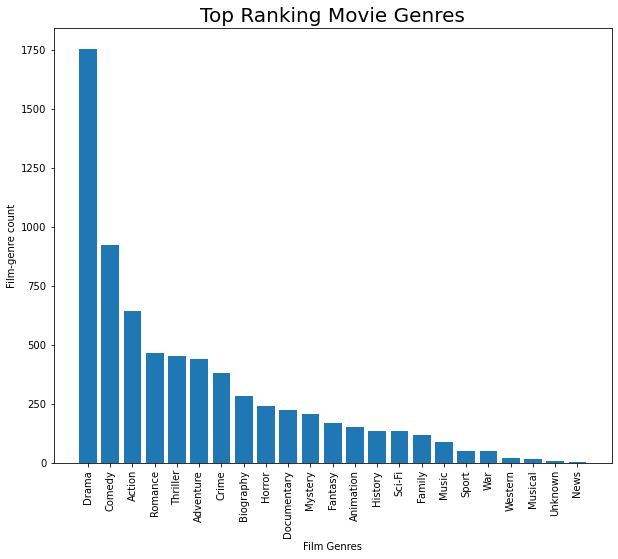

In [29]:
#Top Ranking Movie Genres
top_ranking_movie_genres = highest_rated.head
genre_count_ranks = highest_rated[['genre_1','genre_2','genre_3']].stack().value_counts()
x = genre_count_ranks.index
y = genre_count_ranks.values
plt.figure(figsize=(10,8), facecolor='white', edgecolor='black')
plt.bar(x,y)
plt.title("Top Ranking Movie Genres", fontsize =20)
plt.xticks(rotation=90)
plt.xlabel('Film Genres')
plt.ylabel('Film-genre count');

# RUNTIME AGAINST GENRE_1

In [30]:
runtime_genre = highest_rated.groupby('genre_1', as_index=False).median(numeric_only=True).sort_values('runtime_minutes', ascending=True)
runtime_genre.loc[:,['genre_1','runtime_minutes']]


,genre_1,runtime_minutes
14,Sci-Fi,74.50000
6,Documentary,90.00000
8,Family,92.00000
10,Horror,92.00000
11,Music,93.00000
17,Unknown,93.00000
2,Animation,94.00000
16,Thriller,94.65404
9,Fantasy,100.00000
1,Adventure,100.50000


In [31]:
#finding out the average runtime minutes for a movie  
highest_rated['runtime_minutes'].mean()

107.02273144333826

# plot the runtime per genre graph

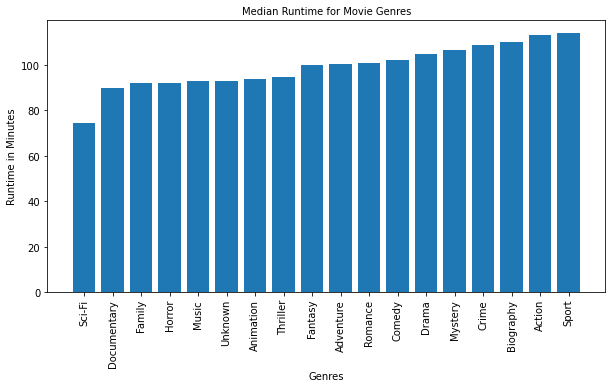

In [32]:


# Create figure and axis objects
fig, ax = plt.subplots(figsize = (10,5))
x = runtime_genre['genre_1']
y = runtime_genre['runtime_minutes']

ax.bar(x, y)

# Set labels and title
ax.set_xlabel("Genres")
ax.set_ylabel("Runtime in Minutes")
ax.set_title("Median Runtime for Movie Genres", size=10)

# Rotate x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.show()

# correlation between domestic gross and production budget

In [33]:
# summary statistics for domestic gross
# check for outliers using a boxplot
print(highest_rated[['domestic_gross']].describe())

       domestic_gross
count    3.024000e+03
mean     3.063810e+07
std      6.650413e+07
min      1.000000e+02
25%      1.447500e+05
50%      2.100000e+06
75%      3.220000e+07
max      7.001000e+08


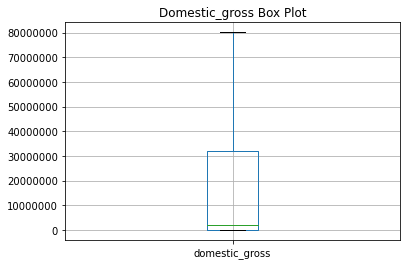

In [34]:
#boxplot
highest_rated.boxplot(column='domestic_gross', showfliers=False)
plt.ticklabel_format(style='plain',axis='y')
plt.title("Domestic_gross Box Plot")
plt.show()

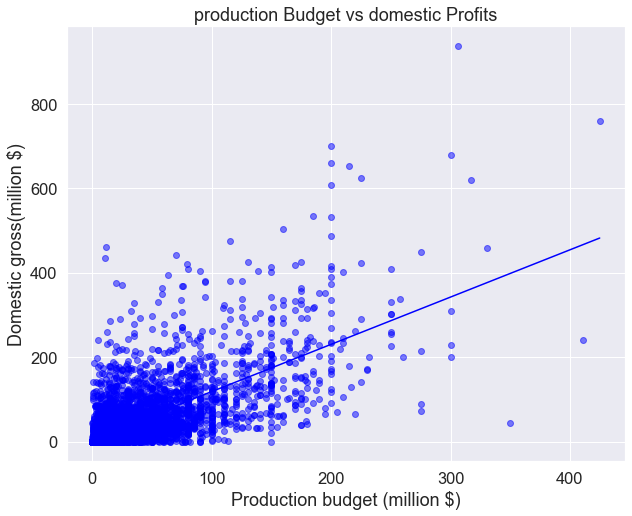

In [35]:
#correlation between production budget and domestic_gross
import seaborn as sns
import numpy as np
sns.set_style("whitegrid")
sns.set(font_scale = 1.5)

x = tnmovies_budget['production_budget']/1000000
y = tnmovies_budget['domestic_gross']/1000000

#this calculates the slope 'm' and y-intercept 'b' of the line of best fit for the given x and y data. '1' indicates straight line.
m, b = np.polyfit(x,y,1)

fig,ax = plt.subplots(figsize=(10,8), facecolor = 'white', edgecolor= 'black')
ax.scatter(x,y, color = 'blue', alpha = .5)

plt.plot(x, m*x +b, color = "blue", label="line of best fit")
ax.set_title("production Budget vs domestic Profits")
ax.set_xlabel("Production budget (million $)")
ax.set_ylabel("Domestic gross(million $)")


ax.ticklabel_format(axis = 'y', style='plain');